# Exploring Titanic data sets

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

Here, we import the data sets of titanic survivors.

In [2]:
titanic = pd.read_csv('titanic_data.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In the dataset, there are total of 891 passengers. The columns describe their Name, Sex, Age, Pclass, Fare, etc.

In [4]:
titanic.drop('PassengerId', axis = 1, inplace = True)

Here, we delete the passenger Id from the data for further analysis.

Text(0.5, 0, '')

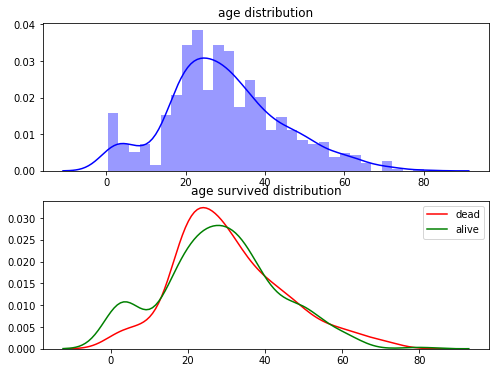

In [17]:
fig, axes = plt.subplots(2,1, figsize = (8,6))
sns.distplot(titanic['Age'], bins = 30, color = 'blue', ax=axes[0])
ax0 = axes[0]
ax0.set_title('age distribution')
ax0.set_xlabel('')

ax1 = axes[1]
ax1.set_title('age survived distribution')

k1 = sns.distplot(titanic[titanic.Survived==0].Age, hist=False, color='r', ax=ax1, label='dead')
k2 = sns.distplot(titanic[titanic.Survived==1].Age, hist=False, color='g', ax=ax1, label='alive')
ax1.set_xlabel('')

As we can see in the above chart, most of the passengers are aged 20-40.

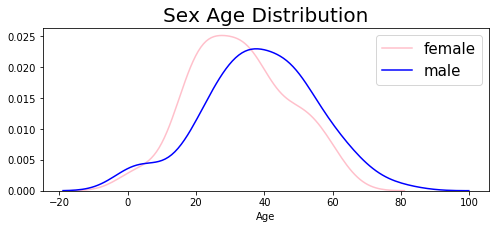

In [6]:
f, ax = plt.subplots(figsize = (8,3))
ax.set_title('Sex Age Distribution', size =20)
sns.distplot(titanic[titanic.Sex == 'female'].dropna().Age, hist = False, color = 'pink', label = 'female')
sns.distplot(titanic[titanic.Sex=='male'].dropna().Age, hist=False, color='blue', label='male')
ax.legend(fontsize=15)

The above graph shows that there are more no. of male passengers in 40-80 age group whereas more no. of female passengers in 10-40 age group.

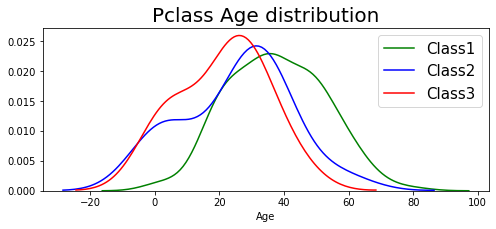

In [7]:
f, ax = plt.subplots(figsize=(8,3))
ax.set_title('Pclass Age distribution', size=20)
sns.distplot(titanic[titanic.Pclass==1].dropna().Age, hist=False, color='green', label='Class1')
sns.distplot(titanic[titanic.Pclass==2].dropna().Age, hist=False, color='blue', label='Class2')
sns.distplot(titanic[titanic.Pclass==3].dropna().Age, hist=False, color='red', label='Class3')
ax.legend(fontsize=15)

In Class 1, there are more older passengers. But the passengers of age group 5-40 are dominant in Class 2 and Class 3.

In [15]:
pclass_dead = titanic[titanic['Survived']==0].groupby('Pclass')['Survived'].count()
pclass_survive = titanic[titanic['Survived']==1].groupby('Pclass')['Survived'].count()

In [9]:
pclass_dead


Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

In [10]:
pclass_survive


Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Pclass survived distribution')

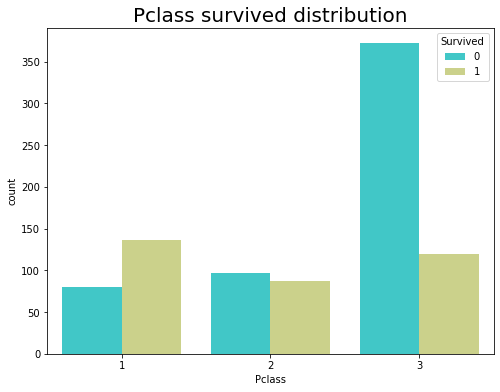

In [11]:
f, ax = plt.subplots(figsize = (8,6))
ax=sns.countplot(x='Pclass',hue='Survived',data=titanic,palette = 'rainbow')
ax.set_title('Pclass survived distribution', size=20)

Class 1 has the highest survival rate whereas the survival rate is low in class3.

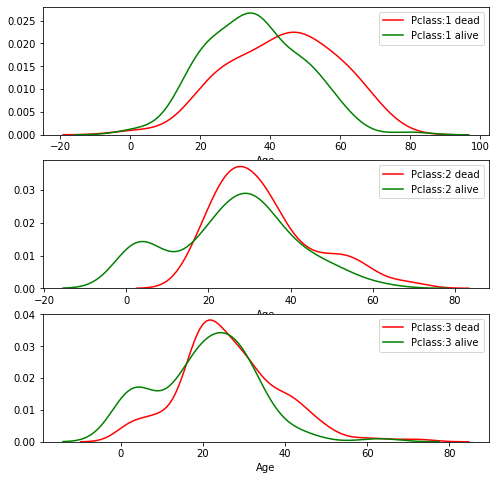

In [12]:
fig, axes = plt.subplots(3,1,figsize=(8,8))
ax.set_title('Class Age survival distribution',size=20)
ax.set_xlabel('age')
for pc in [1,2,3]:
    sns.distplot(titanic[(titanic['Pclass']==pc)&(titanic['Survived']==0)].Age,hist=False,color='red',ax=axes[pc-1],label='Pclass:'+ str(pc) + ' dead')
    sns.distplot(titanic[(titanic['Pclass']==pc)&(titanic['Survived']==1)].Age,hist=False,color='green',ax=axes[pc-1], label='Pclass:'+ str(pc) + ' alive')
    ax = axes[pc-1]

The passengers of age group 5-45 has higher survival rate than the other groups for class 1. Similarly, the passengers of age group 0-15 have higher survival rate in class 2 and class 3.

In [13]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
titanic.groupby('Sex')['Survived'].mean()



Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

There were 577 male passengers and 314 female passengers in the ship. Female passengers have higher survival rate than male.

## Conclusion

Here, we analyzed data about the Titanic survivors with the goal to find out the factors that made people more likely to survive. 
We concluded that the passengers of class 1 have highest survival rate than other classes. Also, the female passengers have more survival rate.